In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 20.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=cbe5334295941dcc57c227b434f9bd815331954ebb646a557e35bbfa00d2645f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

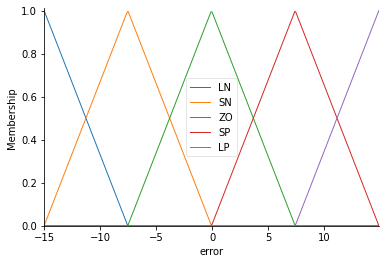

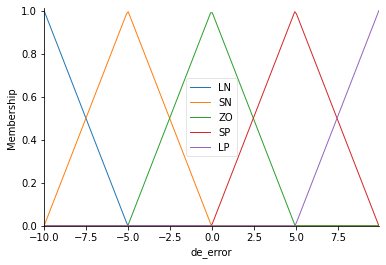

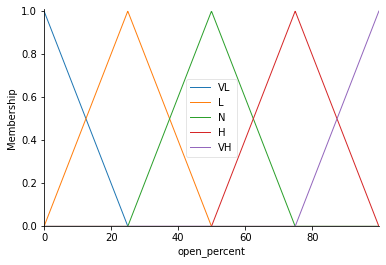

In [22]:
error = ctrl.Antecedent(np.arange(-15,15,0.1),"error")
de_error = ctrl.Antecedent(np.arange(-10,10,0.1),'de_error')

open_percent = ctrl.Consequent(np.arange(0,100,0.1),"open_percent")
error.automf(names = ["LN","SN","ZO","SP","LP"])
de_error.automf(names = ["LN","SN","ZO","SP","LP"])

open_percent.automf(names = ["VL","L","N","H","VH"])

error.view()
de_error.view()
open_percent.view()

In [23]:
rule1 = ctrl.Rule((error["LN"]|(de_error["LN"] or de_error["SN"])) or (error["SN"]|de_error["LN"]),open_percent["VH"])
rule2 = ctrl.Rule((de_error["LN"]|(error["ZO"] or error["SP"])) or (error["LN"]|(de_error["ZO"] or de_error["SP"])) or (error["SN"]|de_error["SN"]),open_percent["H"])
rule3 = ctrl.Rule((error["ZO"]|(de_error["SN"] or de_error["ZO"] or de_error["SP"])) or (error["SP"]|(de_error["SN"] or de_error["ZO"])) or (error["SN"]|(de_error["ZO"] or de_error["SP"])) or (error["LN"]|de_error["LP"]),open_percent["N"])
rule4 = ctrl.Rule((error["SP"]|de_error["SP"]) or (error["LP"]|de_error["SN"]),open_percent["L"])
rule5 = ctrl.Rule((error["LP"]|(de_error["ZO"] or de_error["SP"] or de_error["LP"])) or (de_error["LP"]|(error["SN"] or error["ZO"] or error["SP"])), open_percent["VL"]) 

79.08747496997997


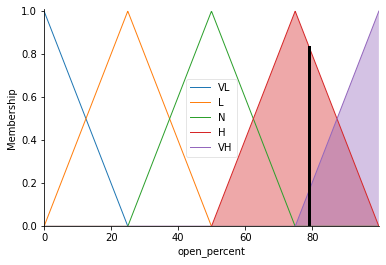

In [24]:
open_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
open_compute = ctrl.ControlSystemSimulation(open_ctrl)
open_compute.input["error"]     = -15
open_compute.input["de_error"]  = -10
open_compute.compute()
print(open_compute.output["open_percent"])
open_percent.view(sim=open_compute)